# IMAGE CLASSIFICATION

## Load Dataset

The CIFAR-10 dataset has 60000 color images from 10 classes.

In [1]:
from tensorflow.keras.datasets import cifar10

2024-11-08 21:51:48.639687: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 21:51:48.727794: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 21:51:48.821134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731082908.917367   61874 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731082908.942484   61874 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 21:51:49.153983: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
(x_train_data, y_train_data), (x_test_data, y_test_data) = cifar10.load_data()

### Display sample images from dataset

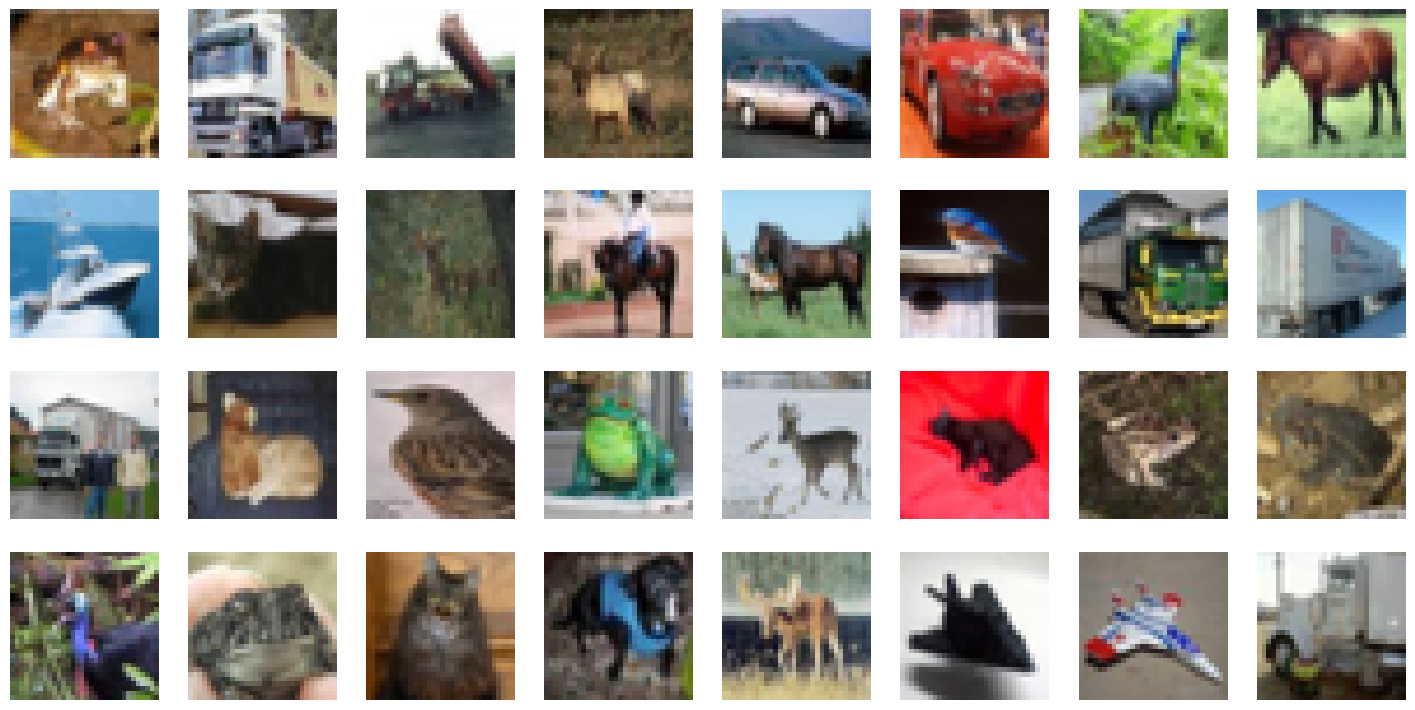

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 9))
num_rows, num_cols = 4, 8

for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(x_train_data[i,:,:])
    plt.axis("off")

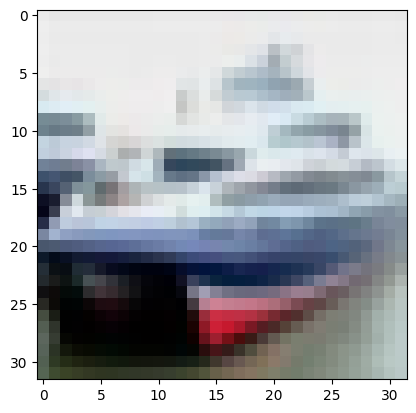

In [4]:
plt.imshow(x_test_data[1])

In [5]:
y_train_data

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
x_train_data.strides

(3072, 32, 1, 1024)

## Preprocessing

In [7]:
from tensorflow.keras.utils import to_categorical

x_train_data = x_train_data.astype("float32") / 255
x_test_data = x_test_data.astype("float32") / 255

y_train_data = to_categorical(y_train_data)
y_test_data = to_categorical(y_test_data)

## Training Parameter Configuration

In [8]:
from dataclasses import dataclass

@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int = 10
    IMAGE_HEIGHT: int = 32
    IMAGE_WIDTH: int = 32
    NUM_CHANNELS: int = 3


@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int = 31
    BATCH_SIZE: int = 256
    LEARNING_RATE: float = 0.001

## Model

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten

def cnn_model(input_shape=(32, 32, 3)):
    model = Sequential()
    
    # CONVOLUTION BLOCK 1, 32 FILTERS
    model.add(Conv2D(
        filters=32, kernel_size=3, padding="same",
        activation="relu", input_shape=input_shape
    ))
    model.add(Conv2D(
        filters=32, kernel_size=3, padding="same",
        activation="relu"
    ))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # CONVOLUTION BLOCK 2, 64 FILTERS
    model.add(Conv2D(
        filters=64, kernel_size=3, padding="same",
        activation="relu", input_shape=input_shape
    ))
    model.add(Conv2D(
        filters=64, kernel_size=3, padding="same",
        activation="relu"
    ))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # CONVOLUTION BLOCK 3, 64 FILTERS
    model.add(Conv2D(
        filters=64, kernel_size=3, padding="same",
        activation="relu", input_shape=input_shape
    ))
    model.add(Conv2D(
        filters=64, kernel_size=3, padding="same",
        activation="relu"
    ))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # FLATTEN THE CONVOLUTION FEAUTRES
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dense(
        DatasetConfig.NUM_CLASSES,
        activation="softmax"
    ))

    return model

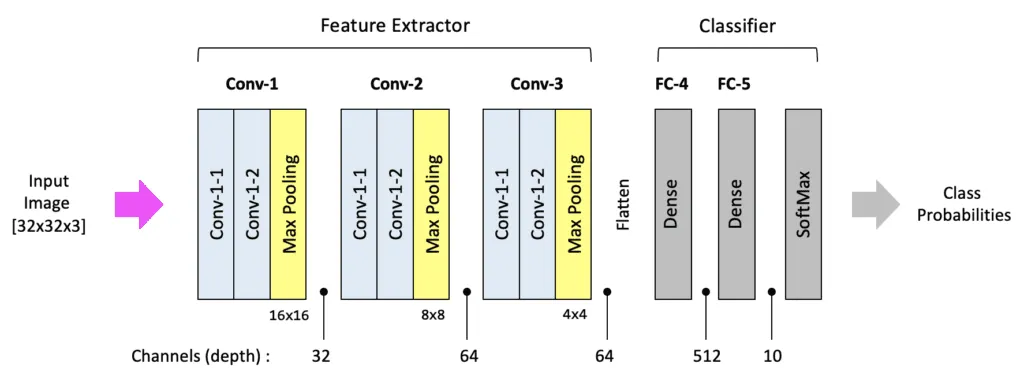

The number of filters in each convolutional layer is which we need to experiment.  
A large number of filters allows model to have greater learning capacity, but this also needs balanced amount of data.

Adding too many filters can lead to overfitting.

In [11]:
model = cnn_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

### Train Model

In [13]:
history = model.fit(
    x_train_data, y_train_data,
    batch_size=TrainingConfig.BATCH_SIZE,
    epochs=TrainingConfig.EPOCHS,
    verbose=1,
    validation_split=0.3
)

Epoch 1/31


2024-11-08 21:56:46.322758: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 430080000 exceeds 10% of free system memory.


137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 441ms/step - accuracy: 0.1887 - loss: 2.1904 - val_accuracy: 0.3039 - val_loss: 1.9216
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 61s 445ms/step - accuracy: 0.3616 - loss: 1.7704 - val_accuracy: 0.4535 - val_loss: 1.5223
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 421ms/step - accuracy: 0.4638 - loss: 1.4944 - val_accuracy: 0.5058 - val_loss: 1.3686
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 422ms/step - accuracy: 0.5275 - loss: 1.3376 - val_accuracy: 0.5521 - val_loss: 1.2580
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 426ms/step - accuracy: 0.5765 - loss: 1.1927 - val_accuracy: 0.5851 - val_loss: 1.1779
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 57s 419ms/step - accuracy: 0.6181 - loss: 1.0797 - val_accuracy: 0.5825 - val_loss: 1.1781
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 427ms/step - accuracy: 0.6560 - loss: 0.9708 - val_accuracy: 0.6444 - val_loss: 1.0131
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 57s 416ms/step - accuracy: 0.7000 - loss: 0.8651 - val

### Plot Results

In [16]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

def plot_results(metrics, metric_name=None, title=None, ylabel=None, ylim=None, color=None):
    fig, ax = plt.subplots(figsize=(15,4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics]
        metric_name = [metric_name]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()
    

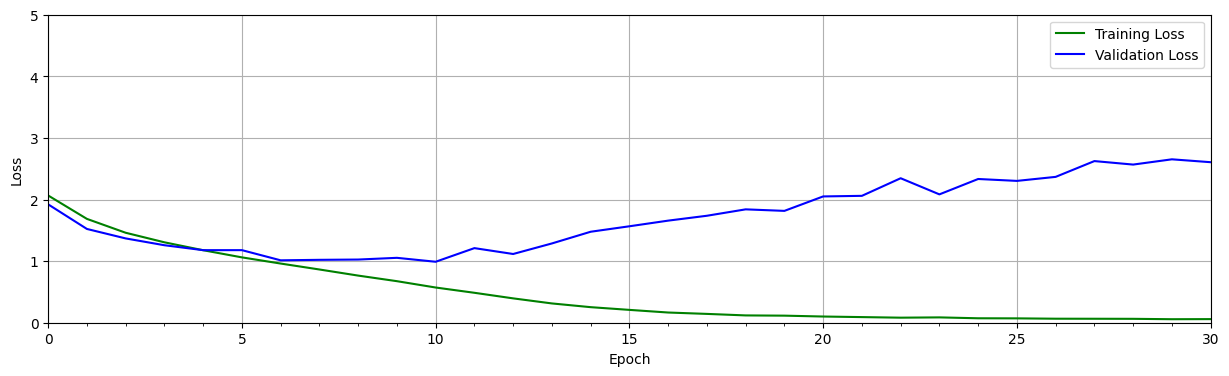

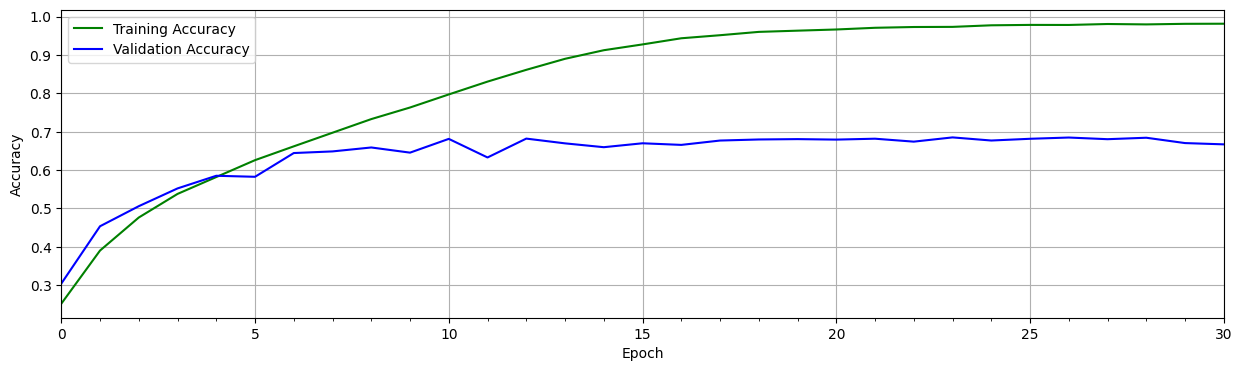

In [25]:
train_loss = history.history["loss"]
train_accuracy = history.history["accuracy"]

validation_loss = history.history["val_loss"]
validation_accuracy = history.history["val_accuracy"]

plot_results(
    metrics=[train_loss, validation_loss],
    metric_name=["Training Loss", "Validation Loss"],
    ylim=[0.0, 5], ylabel="Loss",
    color=["g", "b"]
)

plot_results(
    metrics=[train_accuracy, validation_accuracy],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    ylabel="Accuracy",
    color=["g", "b"]
)


In [28]:
history.params

{'verbose': 1, 'epochs': 31, 'steps': 137}